In [ ]:
import pandas as pd
import numpy as np
from numpy import random
import nltk
import re
import spacy
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_classification

#CrisisLexT6

##Data Preprocessing

In [ ]:
df1=pd.read_csv("/content/CrisisLexT6.csv")

In [ ]:
df1.head()

,tweet id,tweet,label
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood


In [ ]:
df1.shape

(37671, 3)

In [ ]:
df1.rename(columns={'tweet': 'tweet_text', 'label': 'class_label'}, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37671 entries, 0 to 37670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet id     37671 non-null  object
 1   tweet_text   37671 non-null  object
 2   class_label  37671 non-null  object
dtypes: object(3)
memory usage: 883.0+ KB


In [ ]:
df2 = df1

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37671 entries, 0 to 37670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet id     37671 non-null  object
 1   tweet_text   37671 non-null  object
 2   class_label  37671 non-null  object
dtypes: object(3)
memory usage: 883.0+ KB


In [ ]:
df2.class_label.value_counts()

Hurricane       6138
Bombing         5648
Queens_flood    5414
Explosion       5246
NONE            5211
Alb_flood       5187
Torndo          4827
Name: class_label, dtype: int64

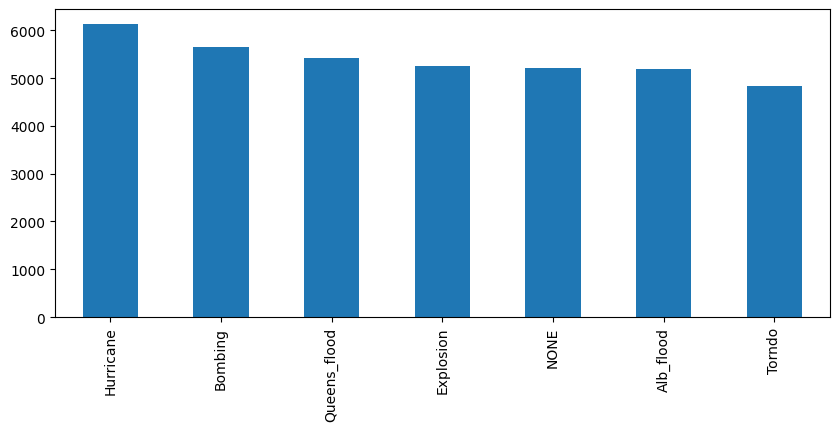

In [ ]:
#my_tags = ['caution_and_advice','displaced_people_and_evacuations','infrastructure_and_utility_damage','injured_or_dead_people','missing_or_found_people','not_humanitarian','other_relevant_information','requests_or_urgent_needs','rescue_volunteering_or_donation_effort','sympathy_and_support']
plt.figure(figsize=(10,4))
df2.class_label.value_counts().plot(kind='bar');

In [ ]:
df2['tweet_text']=df2['tweet_text'].apply(str)

In [ ]:
# Remove HTTP tags
df2['tweet_text_Processed'] = df2['tweet_text'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

,tweet id,tweet_text,class_label,tweet_text_Processed
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,RT Death toll after Oklahoma tornado rises to ...
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,RT Interesting Hurricane Sandy making headline...
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,RT Amatuer cell phone video from father amp da...
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,What if gangnam style is actually just a giant...
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,where can we watch it in qld We ve had floods ...


In [ ]:
#Lower Case
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x: x.lower())
df2.head()

,tweet id,tweet_text,class_label,tweet_text_Processed
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,rt death toll after oklahoma tornado rises to ...
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,rt interesting hurricane sandy making headline...
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,rt amatuer cell phone video from father amp da...
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,what if gangnam style is actually just a giant...
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,where can we watch it in qld we ve had floods ...


In [ ]:
#Remove punctuations
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

,tweet id,tweet_text,class_label,tweet_text_Processed
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,rt death toll after oklahoma tornado rises to ...
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,rt interesting hurricane sandy making headline...
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,rt amatuer cell phone video from father amp da...
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,what if gangnam style is actually just a giant...
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,where can we watch it in qld we ve had floods ...


In [ ]:
#Remove unicodes
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

,tweet id,tweet_text,class_label,tweet_text_Processed
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,rt death toll after oklahoma tornado rises to ...
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,rt interesting hurricane sandy making headline...
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,rt amatuer cell phone video from father amp da...
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,what if gangnam style is actually just a giant...
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,where can we watch it in qld we ve had floods ...


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

In [ ]:
# Remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet id,tweet_text,class_label,tweet_text_Processed
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,rt death toll oklahoma tornado rises 91 oklaho...
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,rt interesting hurricane sandy making headline...
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,rt amatuer cell phone video father amp daughte...
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,gangnam style actually giant rain dance brough...
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,watch qld floods day need fun


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

,tweet id,tweet_text,class_label,tweet_text_Processed
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,rt death toll oklahoma tornado rise 91 oklahom...
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,rt interesting hurricane sandy making headline...
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,rt amatuer cell phone video father amp daughte...
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,gangnam style actually giant rain dance brough...
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,watch qld flood day need fun


In [ ]:
#Removing Stop words again after Lemmatize
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())

,tweet id,tweet_text,class_label,tweet_text_Processed
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,rt death toll oklahoma tornado rise 91 oklahom...
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,rt interesting hurricane sandy making headline...
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,rt amatuer cell phone video father amp daughte...
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,gangnam style actually giant rain dance brough...
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,watch qld flood day need fun


In [ ]:
df2['tweet_text_Processed'].apply(lambda x: len(x.split(' '))).sum()

369409

In [ ]:
df2['num_class_label']=df2['class_label'].replace(['Hurricane', 'Bombing', 'Queens_flood', 'Explosion', 'Alb_flood', 'Torndo', 'NONE' ],
                        [0, 1, 2, 3, 4, 5,6], inplace=False)

In [ ]:
df2.head()

,tweet id,tweet_text,class_label,tweet_text_Processed,num_class_label
0,'336710056655593472',RT @BBCBreaking: Death toll after #Oklahoma to...,Torndo,rt death toll oklahoma tornado rise 91 oklahom...,5
1,'262835144409366528',RT @GhoshAmitav: Interesting Hurricane Sandy m...,Hurricane,rt interesting hurricane sandy making headline...,0
2,'324736258213564416',RT @saratdg: @DianneG: Amatuer cell phone vide...,Explosion,rt amatuer cell phone video father amp daughte...,3
3,'263112797318160384',«@WorkaholicBlake What if gangnam style is act...,Hurricane,gangnam style actually giant rain dance brough...,0
4,'295813643914854400',@wwos9 where can we watch it in qld? We've had...,Queens_flood,watch qld flood day need fun,2


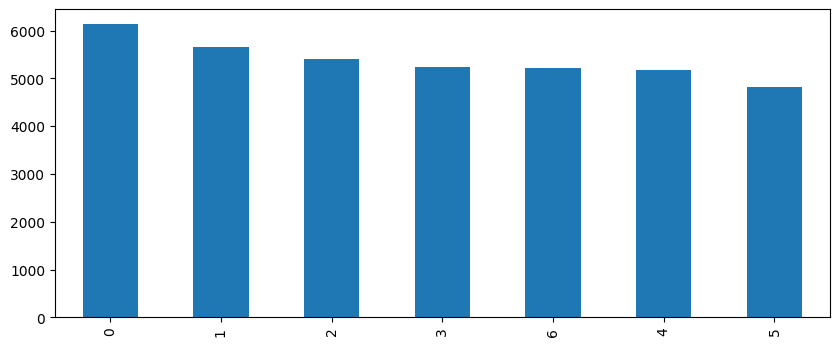

In [ ]:
#my_tags = ['caution_and_advice','displaced_people_and_evacuations','infrastructure_and_utility_damage','injured_or_dead_people','missing_or_found_people','not_humanitarian','other_relevant_information','requests_or_urgent_needs','rescue_volunteering_or_donation_effort','sympathy_and_support']
plt.figure(figsize=(10,4))
df2.num_class_label.value_counts().plot(kind='bar');

In [ ]:
nRow, nCol = df2.shape
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 37671 rows and 5 columns


In [ ]:
df=df2

In [ ]:
#Doing some adjustments

#a=df['tweet_id']

b=df['tweet_text_Processed']

c=df['class_label']

d=df['num_class_label']

df= pd.concat([b,c,d], axis=1)
df.rename(columns={'class' : 'num_class_label'}, 
                    inplace=True)
df

,tweet_text_Processed,class_label,num_class_label
0,rt death toll oklahoma tornado rise 91 oklahom...,Torndo,5
1,rt interesting hurricane sandy making headline...,Hurricane,0
2,rt amatuer cell phone video father amp daughte...,Explosion,3
3,gangnam style actually giant rain dance brough...,Hurricane,0
4,watch qld flood day need fun,Queens_flood,2
...,...,...,...
37666,image scene deadly explosion rock texas town g...,Explosion,3
37667,15 minute south explosion location,Explosion,3
37668,fuck sake brisbane lookin ominous flood bigwet...,Queens_flood,2
37669,wind already destructive storm still mile shor...,Hurricane,0


In [ ]:
df.shape

(37671, 3)

In [ ]:
# Grouping data by label
df.groupby('num_class_label').count()

,tweet_text_Processed,class_label
num_class_label,,
0,6138,6138
1,5648,5648
2,5414,5414
3,5246,5246
4,5187,5187
5,4827,4827
6,5211,5211


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30531 sha256=bafcb35c58296edfcddd3fc981547aa255df0516e437af50c1c170b955179aad
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19471 sha256=0729072d9b02b46a9fd406d5db1659349143883230c292519fd15e9c3773c029
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7910 sha256=1289c250fa8b61c9ccec87df813aadc246747a79f81f51476777b4af4c47d381
  Sto

In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df.index.values,
    df.num_class_label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.num_class_label.values,
    )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    df.loc[X_train_].index.values,
    df.loc[X_train_].num_class_label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.loc[X_train_].num_class_label.values,  
)

In [ ]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [ ]:
df.groupby(['class_label', 'num_class_label', 'data_type']).count()

tweet_text_Processed
class_label  num_class_label data_type                      
Alb_flood    4               test                       1038
                             train                      3319
                             val                         830
Bombing      1               test                       1130
                             train                      3614
                             val                         904
Explosion    3               test                       1049
                             train                      3357
                             val                         840
Hurricane    0               test                       1228
                             train                      3928
                             val                         982
NONE         6               test                       1042
                             train                      3335
                             val                         834
Queens_flood 2               test                       1083
                             train                      3465
                             val                         866
Torndo       5               test                        965
                             train                      3090
                             val                         772

In [ ]:
df

,tweet_text_Processed,class_label,num_class_label,data_type
0,rt death toll oklahoma tornado rise 91 oklahom...,Torndo,5,train
1,rt interesting hurricane sandy making headline...,Hurricane,0,train
2,rt amatuer cell phone video father amp daughte...,Explosion,3,train
3,gangnam style actually giant rain dance brough...,Hurricane,0,train
4,watch qld flood day need fun,Queens_flood,2,train
...,...,...,...,...
37666,image scene deadly explosion rock texas town g...,Explosion,3,test
37667,15 minute south explosion location,Explosion,3,train
37668,fuck sake brisbane lookin ominous flood bigwet...,Queens_flood,2,train
37669,wind already destructive storm still mile shor...,Hurricane,0,train


In [ ]:
#df.to_csv('file_1.csv')

In [ ]:
df_train = df.loc[df["data_type"]=="train"]
df_train.head(5)

,tweet_text_Processed,class_label,num_class_label,data_type
0,rt death toll oklahoma tornado rise 91 oklahom...,Torndo,5,train
1,rt interesting hurricane sandy making headline...,Hurricane,0,train
2,rt amatuer cell phone video father amp daughte...,Explosion,3,train
3,gangnam style actually giant rain dance brough...,Hurricane,0,train
4,watch qld flood day need fun,Queens_flood,2,train


In [ ]:
df_val = df.loc[df["data_type"]=="val"]
df_val.head(5)

,tweet_text_Processed,class_label,num_class_label,data_type
7,rt ontario 4 confirmed 2013 tornado avg 12 yr ...,Torndo,5,val
21,australia would go fire warning flood warning ...,Queens_flood,2,val
34,rt every 100 retweets donating 1 000 help rebu...,Hurricane,0,val
35,rt love prayer oklahoma incredibly devastating,Torndo,5,val
37,rt happy helping abflood victim client log don...,Alb_flood,4,val


In [ ]:
df_test = df.loc[df["data_type"]=="test"]
df_test.head(5)

,tweet_text_Processed,class_label,num_class_label,data_type
6,morning thought great people calgary calgaryst...,Alb_flood,4,test
10,rt insane nasa satellite view hurricane sandy ...,Hurricane,0,test
11,queensland flood crisis deepens death toll ris...,Queens_flood,2,test
13,related functioning 50 pop tart capacity repea...,Hurricane,0,test
15,made giggle watch news nut lol hurricane,Hurricane,0,test


In [ ]:
df.dtypes

tweet_text_Processed    object
class_label             object
num_class_label          int64
data_type               object
dtype: object

In [ ]:
train_data_labels= df_train.num_class_label.values

In [ ]:
len(train_data_labels)

24108

In [ ]:
print(train_data_labels)

[5 0 3 ... 2 0 6]


In [ ]:
val_data_labels= df_val.num_class_label.values

In [ ]:
len(val_data_labels)

6028

In [ ]:
print(val_data_labels)

[5 2 0 ... 6 4 5]


In [ ]:
test_data_labels= df_test.num_class_label.values

In [ ]:
len(test_data_labels)

7535

In [ ]:
print(test_data_labels)

[4 0 2 ... 6 6 3]


In [ ]:
def clean_tweet(tweet):
    #tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    #tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    #tweet = re.sub(r"[^a-Za-Z.!?']", ' ', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    return tweet

In [ ]:
train_data_clean = [clean_tweet(tweet) for tweet in df_train.tweet_text_Processed]

In [ ]:
print(train_data_clean[0:1])

['rt death toll oklahoma tornado rise 91 oklahoma city medical examiner office']


In [ ]:
len(train_data_clean)

24108

In [ ]:
val_data_clean = [clean_tweet(tweet) for tweet in df_val.tweet_text_Processed]

In [ ]:
len(val_data_clean)

6028

In [ ]:
test_data_clean = [clean_tweet(tweet) for tweet in df_test.tweet_text_Processed]

In [ ]:
len(test_data_clean)

7535

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case= bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case) 

In [ ]:
def encode_sentence(sent):
    return ["[CLS]"] + tokenizer.tokenize(sent) + ["[SEP]"]

In [ ]:
train_data_inputs = [encode_sentence(sentence) for sentence in train_data_clean]

In [ ]:
print(train_data_inputs[0])

['[CLS]', 'rt', 'death', 'toll', 'oklahoma', 'tornado', 'rise', '91', 'oklahoma', 'city', 'medical', 'examiner', 'office', '[SEP]']


In [ ]:
print(len(train_data_inputs[0]))

14


In [ ]:
val_data_inputs = [encode_sentence(sentence) for sentence in val_data_clean]

In [ ]:
print(val_data_inputs[1])

['[CLS]', 'australia', 'would', 'go', 'fire', 'warning', 'flood', 'warning', 'le', 'week', '[SEP]']


In [ ]:
test_data_inputs = [encode_sentence(sentence) for sentence in test_data_clean]

In [ ]:
print(test_data_inputs[0])

['[CLS]', 'morning', 'thought', 'great', 'people', 'calgary', 'calgary', '##st', '##rong', 'calgary', '##fl', '##ood', 'y', '##y', '##c', '##fl', '##ood', '[SEP]']


In [ ]:
def get_ids(tokens):
    return tokenizer.convert_tokens_to_ids(tokens)

def get_mask(tokens):
    return np.char.not_equal(tokens,"[PAD]").astype(int)

def get_segments(tokens):
    seg_ids = []
    current_seg_id = 0
    for tok in tokens:
        seg_ids.append(current_seg_id)
        if tok == "[SEP]":
            current_sig_id = 1-current_seg_id
    return seg_ids


In [ ]:
data_with_len = [ [sent, train_data_labels[i], len(sent)] for i, sent in enumerate(train_data_inputs) ]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
train_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 2]

In [ ]:
train_all_dataset = tf.data.Dataset.from_generator(lambda: train_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
train_all_batched = train_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(train_sorted_all)

24107

In [ ]:
NB_BATCHES = math.ceil(len(train_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
train_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
train_dataset = train_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [ ]:
data_with_len = [[sent, val_data_labels[i], len(sent)]
                 for i, sent in enumerate(val_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
val_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 4]

In [ ]:
print(len((val_data_labels)))

6028


In [ ]:
val_all_dataset = tf.data.Dataset.from_generator(lambda: val_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
val_all_batched = val_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(val_sorted_all)

5977

In [ ]:
NB_BATCHES = math.ceil(len(val_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
val_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
val_dataset = val_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(val_dataset))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [ ]:
data_with_len = [[sent, test_data_labels[i], len(sent)]
                 for i, sent in enumerate(test_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
test_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 2]

In [ ]:
test_all_dataset = tf.data.Dataset.from_generator(lambda: test_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
test_all_batched = test_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(test_sorted_all)

7535

In [ ]:
NB_BATCHES = math.ceil(len(test_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
test_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
test_dataset = test_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(test_dataset))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


##Model building

In [ ]:
#my_sent = ['[CLS]'] + tokenizer.tokenize("Rose are red.") + ["[SEP]"]
#bert_layer([tf.expand_dims(tf.cast(get_ids(my_sent), tf.int32), 0),
#            tf.expand_dims(tf.cast(get_mask(my_sent), tf.int32), 0),
#            tf.expand_dims(tf.cast(get_segments(my_sent), tf.int32), 0)])

In [ ]:
class DCNNBERTEmbedding(tf.keras.Model):
    
    def __init__(self,
              nb_filters=50,
              FFN_units=512,
              nb_classes=7,
              dropout_rate=0.1,
              name="dcnn"):
        super(DCNNBERTEmbedding, self).__init__(name=name)

        self.bert_layer = hub.KerasLayer(
            "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
            trainable=False)

        
        self.bigram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=2,
                                    padding='valid',
                                    activation='relu')
        self.trigram = layers.Conv1D(filters=nb_filters,
                                     kernel_size=3,
                                     padding='valid',
                                     activation='relu')
        self.fourgram = layers.Conv1D(filters=nb_filters,
                                      kernel_size=4,
                                      padding='valid',
                                      activation='relu')
        self.pool = layers.GlobalMaxPooling1D()

        self.dense_1 = layers.Dense(units=FFN_units,
                                    activation='relu')
        self.dropout = layers.Dropout(rate = dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation='sigmoid')
        else:
            self.last_dense = layers.Dense(units = nb_classes,
                                           activation ='softmax')
    

    def embed_with_bert(self, all_tokens):
        _, embs= self.bert_layer([all_tokens[:, 0, :],
                                  all_tokens[:, 1, :],
                                  all_tokens[:, 2, :]])
        return embs

    def call(self, inputs, training):
        x= self.embed_with_bert(inputs)

        x_1= self.bigram(x)
        x_1= self.pool(x_1)
        x_2= self.trigram(x)
        x_2= self.pool(x_2)
        x_3= self.fourgram(x)
        x_3= self.pool(x_3)


        merged = tf.concat([x_1, x_2, x_3], axis=-1)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output= self.last_dense(merged)

        return output

##Model Training

In [ ]:
NB_FILTERS= 100
FFN_UNITS= 256
NB_CLASSES = 7

DROPOUT_RATE = 0.2
BATCH_SIZE= 32
NB_EPOCHS = 5

In [ ]:
Dcnn = DCNNBERTEmbedding(nb_filters=NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [ ]:
if NB_CLASSES == 2:
    Dcnn.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['sparse_categorical_accuracy'])


In [ ]:
#Dcnn.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
#plot_model(Dcnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##Result

In [ ]:
Dcnn.fit(train_dataset,
         epochs=NB_EPOCHS)
         #callbacks=[MyCustomCallback()])

Epoch 1/5
754/754 [==============================] - 57s 43ms/step - loss: 0.3088 - sparse_categorical_accuracy: 0.9050
Epoch 2/5
754/754 [==============================] - 29s 38ms/step - loss: 0.1681 - sparse_categorical_accuracy: 0.9496
Epoch 3/5
754/754 [==============================] - 29s 38ms/step - loss: 0.1094 - sparse_categorical_accuracy: 0.9674
Epoch 4/5
754/754 [==============================] - 29s 38ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9762
Epoch 5/5
754/754 [==============================] - 29s 38ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9797


##Evaluation

In [ ]:
y_val_predict =Dcnn.predict(val_dataset)

187/187 [==============================] - 8s 37ms/step


In [ ]:
y_val_predict.shape

(5977, 7)

In [ ]:
type(y_val_predict)

numpy.ndarray

In [ ]:
np.isnan(np.min(y_val_predict))

False

In [ ]:
print(y_val_predict)

[[9.9999857e-01 1.3003024e-11 5.4560414e-13 ... 8.9237299e-14
  1.9272639e-12 1.4185531e-06]
 [9.9895978e-01 3.9461529e-06 1.1195203e-04 ... 1.7327842e-05
  2.7277332e-04 6.2768266e-04]
 [9.7182870e-04 1.0218612e-02 3.2558778e-04 ... 3.7860085e-04
  6.9218851e-03 9.7656506e-01]
 ...
 [4.3854562e-16 8.9224321e-21 9.9999976e-01 ... 2.3149636e-14
  2.1053280e-17 1.8634860e-07]
 [1.6151455e-08 3.7968045e-11 2.0163391e-09 ... 9.9999416e-01
  3.3875749e-10 5.8085079e-06]
 [1.1814845e-02 1.2291581e-07 8.5416963e-05 ... 2.0592092e-06
  9.8691595e-01 1.1814602e-03]]


In [ ]:
results =Dcnn.evaluate(val_dataset)
print(results)

187/187 [==============================] - 8s 37ms/step - loss: 0.3137 - sparse_categorical_accuracy: 0.9222
[0.3136705160140991, 0.9222017526626587]


In [ ]:
classes = np.argmax(y_val_predict, axis=-1)

In [ ]:
tweet = []
val_labels = []
predictions = []
for tweet, labels in val_dataset.take(-1):
  tweet = tweet.numpy()
  val_labels.append(labels.numpy())
  predictions.append(Dcnn.predict(tweet))

1/1 [==============================] - 2s 2s/step


In [ ]:
val_labels[0:1]

[array([0, 0, 6, 6, 5, 6, 1, 5, 0, 2, 5, 5, 0, 0, 6, 6, 6, 6, 5, 6, 5, 6,
        6, 6, 0, 6, 0, 5, 5, 5, 6, 0], dtype=int32)]

In [ ]:
predictions[0:2]

[array([[9.99998569e-01, 1.30030240e-11, 5.45604143e-13, 3.86960673e-13,
         8.92372995e-14, 1.92726390e-12, 1.41855310e-06],
        [9.98959780e-01, 3.94615290e-06, 1.11952031e-04, 6.58175668e-06,
         1.73278422e-05, 2.72773323e-04, 6.27682661e-04],
        [9.71828704e-04, 1.02186119e-02, 3.25587782e-04, 4.61841607e-03,
         3.78600846e-04, 6.92188507e-03, 9.76565063e-01],
        [1.64210480e-02, 5.68420859e-03, 2.08997121e-03, 2.86457827e-04,
         3.28733382e-04, 3.56119424e-02, 9.39577579e-01],
        [6.34892217e-07, 1.63154841e-08, 5.80926276e-08, 1.24679252e-06,
         2.94079939e-07, 9.99974370e-01, 2.35259467e-05],
        [8.75852585e-01, 3.28735658e-03, 3.67474044e-03, 2.27278113e-04,
         3.35607561e-03, 1.57476973e-03, 1.12027206e-01],
        [5.07565604e-12, 9.99995947e-01, 9.86356111e-14, 3.98165776e-06,
         1.52008885e-13, 4.65897344e-15, 1.77775561e-07],
        [8.50084001e-13, 2.86538329e-16, 1.05224805e-11, 2.24309520e-14,
         2

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
from itertools import chain
val_label = np.array(list(chain.from_iterable(val_labels)))

In [ ]:
type(val_label)

numpy.ndarray

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(val_label, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.98      0.88       975
     class 1       0.94      0.94      0.94       902
     class 2       0.97      0.96      0.97       866
     class 3       0.95      0.96      0.96       840
     class 4       0.98      0.96      0.97       830
     class 5       0.94      0.96      0.95       769
     class 6       0.91      0.68      0.78       795

    accuracy                           0.92      5977
   macro avg       0.93      0.92      0.92      5977
weighted avg       0.93      0.92      0.92      5977



In [ ]:
y_test_predict =Dcnn.predict(test_dataset)

236/236 [==============================] - 8s 35ms/step


In [ ]:
len(y_test_predict)

7535

In [ ]:
y_test_predict.shape

(7535, 7)

In [ ]:
type(y_test_predict)

numpy.ndarray

In [ ]:
np.isnan(np.min(y_test_predict))

False

In [ ]:
print(y_test_predict)

[[3.8085207e-03 4.0196560e-06 7.7223522e-06 ... 2.8869092e-06
  2.3548284e-05 9.9615294e-01]
 [2.7513510e-02 5.0208041e-06 1.1811550e-05 ... 1.5017082e-05
  4.7402362e-05 9.7240430e-01]
 [1.3148251e-01 3.5857133e-04 2.0824185e-04 ... 1.8045306e-04
  5.4368046e-03 8.6215514e-01]
 ...
 [4.7048606e-04 1.3392930e-08 9.9907851e-01 ... 3.8239900e-06
  8.7073215e-07 4.4632811e-04]
 [5.6520072e-08 1.0485950e-13 7.3204886e-13 ... 9.9999917e-01
  1.8207909e-11 8.2604117e-07]
 [6.4939159e-06 1.7118108e-08 1.0916562e-08 ... 9.9994671e-01
  2.0013173e-08 4.6785011e-05]]


In [ ]:
results =Dcnn.evaluate(test_dataset)
print(results)

236/236 [==============================] - 9s 38ms/step - loss: 0.2924 - sparse_categorical_accuracy: 0.9249
[0.292390912771225, 0.9248839020729065]


In [ ]:
test_classes = np.argmax(y_test_predict, axis=-1)

In [ ]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_dataset.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(Dcnn.predict(tweet))

1/1 [==============================] - 0s 28ms/step


In [ ]:
test_labels[0:1]

[array([6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 0, 6, 6, 6, 3], dtype=int32)]

In [ ]:
predictions[0:2]

[array([[3.80852073e-03, 4.01965599e-06, 7.72235217e-06, 3.10393858e-07,
         2.88690921e-06, 2.35482839e-05, 9.96152937e-01],
        [2.75135096e-02, 5.02080411e-06, 1.18115504e-05, 2.96211624e-06,
         1.50170818e-05, 4.74023618e-05, 9.72404301e-01],
        [1.31482512e-01, 3.58571328e-04, 2.08241850e-04, 1.78319431e-04,
         1.80453062e-04, 5.43680461e-03, 8.62155139e-01],
        [1.25532493e-01, 5.21077425e-04, 7.12776091e-04, 1.03484286e-04,
         8.44418420e-04, 5.85333165e-03, 8.66432428e-01],
        [9.03105885e-02, 2.82601686e-04, 9.13286989e-04, 6.97573050e-05,
         2.47454795e-04, 6.55949814e-03, 9.01616752e-01],
        [9.07083526e-02, 2.75319471e-05, 7.68151949e-05, 7.64626384e-06,
         1.30895904e-04, 2.10511454e-04, 9.08838272e-01],
        [4.11221087e-02, 6.96004736e-06, 1.62730521e-05, 5.33104139e-06,
         3.60801960e-06, 3.68064153e-04, 9.58477676e-01],
        [6.64835036e-01, 1.19570141e-04, 2.16292508e-04, 1.10891451e-05,
         1

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
test_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
type(test_pred)

numpy.ndarray

In [ ]:
len(test_pred)

7535

In [ ]:
from itertools import chain
test_label = np.array(list(chain.from_iterable(test_labels)))

In [ ]:
type(test_label)

numpy.ndarray

In [ ]:
len(test_label)

7535

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(test_label, test_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.97      0.88      1228
     class 1       0.95      0.95      0.95      1130
     class 2       0.98      0.96      0.97      1083
     class 3       0.97      0.97      0.97      1049
     class 4       0.97      0.97      0.97      1038
     class 5       0.95      0.95      0.95       965
     class 6       0.90      0.68      0.78      1042

    accuracy                           0.92      7535
   macro avg       0.93      0.92      0.92      7535
weighted avg       0.93      0.92      0.92      7535



In [ ]:
confusion_matrix(test_label, test_pred)

array([[1189,    5,    6,    0,    2,    5,   21],
       [   8, 1079,    0,   20,    1,    6,   16],
       [  28,    1, 1041,    0,    3,    3,    7],
       [   3,   13,    0, 1020,    0,    3,   10],
       [  14,    1,    3,    0, 1006,    2,   12],
       [  23,    4,    0,    2,    2,  921,   13],
       [ 219,   37,   12,   14,   20,   27,  713]])

#CrisisLexT26

##Data Preprocessing

In [ ]:
df1=pd.read_csv("/content/shuffle_Crisislex_T26.csv")

In [ ]:
df1.head()

,Tweet ID,Tweet Text,Informativeness
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda


In [ ]:
#first_column = df1.columns[0]

In [ ]:
#df1 = df1.drop([first_column], axis=1)

In [ ]:
df1.shape

(25575, 3)

In [ ]:
df1.rename(columns={'Tweet Text': 'tweet_text', 'Informativeness': 'class_label'}, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tweet ID     25575 non-null  float64
 1   tweet_text   25575 non-null  object 
 2   class_label  25575 non-null  object 
dtypes: float64(1), object(2)
memory usage: 599.5+ KB


In [ ]:
df2 = df1

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tweet ID     25575 non-null  float64
 1   tweet_text   25575 non-null  object 
 2   class_label  25575 non-null  object 
dtypes: float64(1), object(2)
memory usage: 599.5+ KB


In [ ]:
df2.class_label.value_counts()

Russia_meteor               1132
None                        1002
NY_train_crash               999
Spain_train_crash            991
Alberta_floods               981
Bohol_earthquake             969
Lac_Megantic_train_crash     966
Colorado_wildfires           953
Brazil_nightclub_fire        952
Australia_bushfire           949
Italy_earthquakes            940
Guatemala_earthquake         940
Venezuela_refinery           939
Typhoon_Yolanda              939
Singapore_haze               933
Boston_bombings              929
Sardinia_floods              925
Colorado_floods              925
Manila_floods                921
Queensland_floods            919
Glasgow_helicopter_crash     918
LA_airport_shootings         912
West_Texas_explosion         911
Savar_building_collapse      911
Costa_Rica_earthquake        908
Philipinnes_floods           906
Typhoon_Pablo                905
Name: class_label, dtype: int64

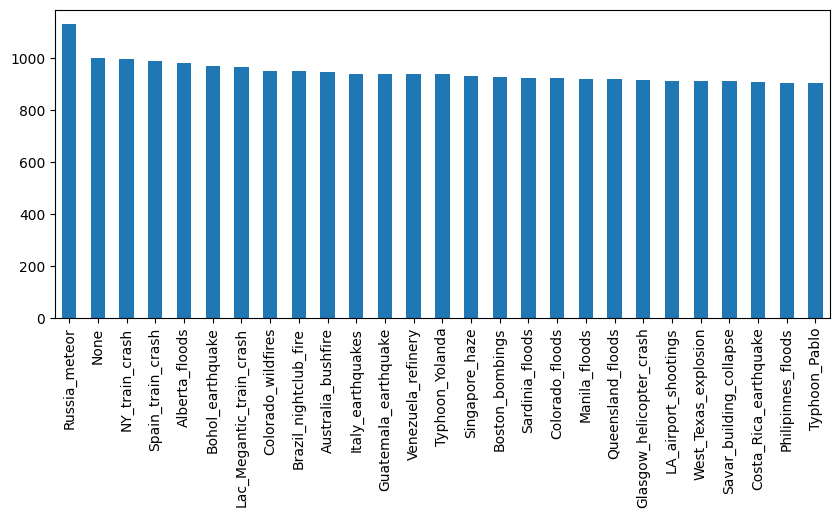

In [ ]:
#my_tags = ['caution_and_advice','displaced_people_and_evacuations','infrastructure_and_utility_damage','injured_or_dead_people','missing_or_found_people','not_humanitarian','other_relevant_information','requests_or_urgent_needs','rescue_volunteering_or_donation_effort','sympathy_and_support']
plt.figure(figsize=(10,4))
df2.class_label.value_counts().plot(kind='bar');

In [ ]:
df2['tweet_text']=df2['tweet_text'].apply(str)

In [ ]:
# Remove HTTP tags
df2['tweet_text_Processed'] = df2['tweet_text'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

,Tweet ID,tweet_text,class_label,tweet_text_Processed
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,RT Let s all pray for those who lost their hom...
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,RT Wow Meteor over Russia and for the sonic boom
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,RT Death Toll in the Philippines typhoon is 4 ...
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,RT WHOA Heavy erosion UNDER the pavement RT 25...
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,RT Grab s new album for just 1 part of a great...


In [ ]:
#Lower Case
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x: x.lower())
df2.head()

,Tweet ID,tweet_text,class_label,tweet_text_Processed
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,rt let s all pray for those who lost their hom...
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,rt wow meteor over russia and for the sonic boom
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,rt death toll in the philippines typhoon is 4 ...
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,rt whoa heavy erosion under the pavement rt 25...
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,rt grab s new album for just 1 part of a great...


In [ ]:
#Remove punctuations
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

,Tweet ID,tweet_text,class_label,tweet_text_Processed
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,rt let s all pray for those who lost their hom...
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,rt wow meteor over russia and for the sonic boom
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,rt death toll in the philippines typhoon is 4 ...
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,rt whoa heavy erosion under the pavement rt 25...
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,rt grab s new album for just 1 part of a great...


In [ ]:
#Remove unicodes
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

,Tweet ID,tweet_text,class_label,tweet_text_Processed
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,rt let s all pray for those who lost their hom...
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,rt wow meteor over russia and for the sonic boom
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,rt death toll in the philippines typhoon is 4 ...
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,rt whoa heavy erosion under the pavement rt 25...
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,rt grab s new album for just 1 part of a great...


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

In [ ]:
# Remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet ID,tweet_text,class_label,tweet_text_Processed
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,rt let pray lost homes living cold starving re...
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,rt wow meteor russia sonic boom
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,rt death toll philippines typhoon 4 000 plus a...
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,rt whoa heavy erosion pavement rt 25th ave erl...
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,rt grab new album 1 part great cause philippin...


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

,Tweet ID,tweet_text,class_label,tweet_text_Processed
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,rt let pray lost home living cold starving res...
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,rt wow meteor russia sonic boom
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,rt death toll philippine typhoon 4 000 plus am...
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,rt whoa heavy erosion pavement rt 25th ave erl...
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,rt grab new album 1 part great cause philippin...


In [ ]:
#Removing Stop words again after Lemmatize
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())

,Tweet ID,tweet_text,class_label,tweet_text_Processed
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,rt let pray lost home living cold starving res...
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,rt wow meteor russia sonic boom
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,rt death toll philippine typhoon 4 000 plus am...
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,rt whoa heavy erosion pavement rt 25th ave erl...
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,rt grab new album 1 part great cause philippin...


In [ ]:
df2['tweet_text_Processed'].apply(lambda x: len(x.split(' '))).sum()

297206

In [ ]:
df2['num_class_label']=df2['class_label'].replace(['Guatemala_earthquake', 'Sardinia_floods', 'Australia_bushfire', 'Glasgow_helicopter_crash', 'Brazil_nightclub_fire', 'Typhoon_Yolanda', 'Colorado_wildfires', 'None', 'Singapore_haze', 'Queensland_floods', 'West_Texas_explosion', 'Costa_Rica_earthquake', 'Lac_Megantic_train_crash', 'Savar_building_collapse', 'Philipinnes_floods', 'Italy_earthquakes', 'Venezuela_refinery', 'Russia_meteor', 'Manila_floods', 'Colorado_floods', 'NY_train_crash', 'LA_airport_shootings', 'Boston_bombings', 'Spain_train_crash', 'Typhoon_Pablo', 'Bohol_earthquake', 'Alberta_floods'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], inplace=False)

In [ ]:
df2.head()

,Tweet ID,tweet_text,class_label,tweet_text_Processed,num_class_label
0,2.330000e+17,RT @KMSians: Let's all pray for those who lost...,Philipinnes_floods,rt let pray lost home living cold starving res...,14
1,3.020000e+17,RT @Crusaderofchaos: Wow! #Meteor over Russia ...,Russia_meteor,rt wow meteor russia sonic boom,17
2,4.010000e+17,RT @ParkerMcKinley: Death Toll in the Philippi...,Typhoon_Yolanda,rt death toll philippine typhoon 4 000 plus am...,5
3,3.490000e+17,RT @tedhenley: WHOA!?! Heavy erosion UNDER the...,Alberta_floods,rt whoa heavy erosion pavement rt 25th ave erl...,26
4,4.100000e+17,RT @Polyvinyl: Grab @sslyby's new album for ju...,Typhoon_Yolanda,rt grab new album 1 part great cause philippin...,5


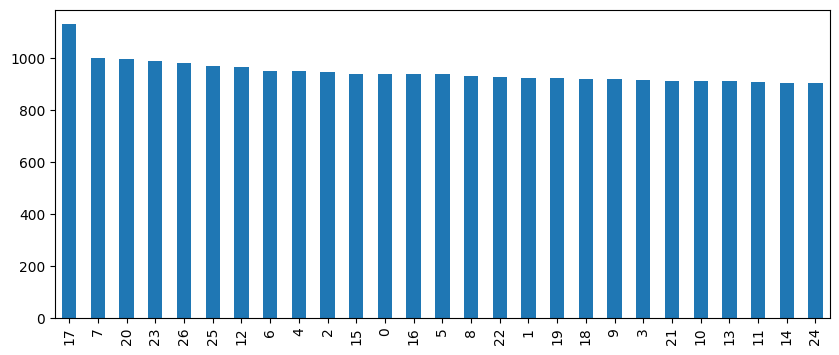

In [ ]:
#my_tags = ['caution_and_advice','displaced_people_and_evacuations','infrastructure_and_utility_damage','injured_or_dead_people','missing_or_found_people','not_humanitarian','other_relevant_information','requests_or_urgent_needs','rescue_volunteering_or_donation_effort','sympathy_and_support']
plt.figure(figsize=(10,4))
df2.num_class_label.value_counts().plot(kind='bar');

In [ ]:
df2.num_class_label.isnull().sum().any()

False

In [ ]:
df2.num_class_label

0        14
1        17
2         5
3        26
4         5
         ..
25570    14
25571    14
25572     1
25573    11
25574    24
Name: num_class_label, Length: 25575, dtype: int64

In [ ]:
df2.num_class_label.unique()

array([14, 17,  5, 26, 18, 19, 22,  9, 12, 15,  8, 25, 23, 10, 16,  4,  2,
       21,  3,  0, 20,  6, 13,  1, 11, 24,  7])

In [ ]:
nRow, nCol = df2.shape
print('There are {} rows and {} columns'.format(nRow, nCol))

There are 25575 rows and 5 columns


In [ ]:
df=df2

In [ ]:
#Doing some adjustments

#a=df['tweet_id']

b=df['tweet_text_Processed']

c=df['class_label']

d=df['num_class_label']

df= pd.concat([b,c,d], axis=1)
df.rename(columns={'class' : 'num_class_label'}, 
                    inplace=True)
df

,tweet_text_Processed,class_label,num_class_label
0,rt let pray lost home living cold starving res...,Philipinnes_floods,14
1,rt wow meteor russia sonic boom,Russia_meteor,17
2,rt death toll philippine typhoon 4 000 plus am...,Typhoon_Yolanda,5
3,rt whoa heavy erosion pavement rt 25th ave erl...,Alberta_floods,26
4,rt grab new album 1 part great cause philippin...,Typhoon_Yolanda,5
...,...,...,...
25570,melyn pabustan w 3 kid 09175119505 purok 3 mal...,Philipinnes_floods,14
25571,rt hospital need help food amp water ust hospi...,Philipinnes_floods,14
25572,rt forzasardegna sardegna,Sardinia_floods,1
25573,rt alaire terremoto de 7 6 grados sacude costa...,Costa_Rica_earthquake,11


In [ ]:
df.shape

(25575, 3)

In [ ]:
# Grouping data by label
df.groupby('num_class_label').count()

,tweet_text_Processed,class_label
num_class_label,,
0,940,940
1,925,925
2,949,949
3,918,918
4,952,952
5,939,939
6,953,953
7,1002,1002
8,933,933


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df.index.values,
    df.num_class_label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.num_class_label.values,
    )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    df.loc[X_train_].index.values,
    df.loc[X_train_].num_class_label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.loc[X_train_].num_class_label.values,  
)

In [ ]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [ ]:
df.groupby(['class_label', 'num_class_label', 'data_type']).count()

tweet_text_Processed
class_label          num_class_label data_type                      
Alberta_floods       26              test                        196
                                     train                       628
                                     val                         157
Australia_bushfire   2               test                        190
                                     train                       607
...                                                              ...
Venezuela_refinery   16              train                       601
                                     val                         150
West_Texas_explosion 10              test                        182
                                     train                       583
                                     val                         146

[81 rows x 1 columns]

In [ ]:
df

,tweet_text_Processed,class_label,num_class_label,data_type
0,rt let pray lost home living cold starving res...,Philipinnes_floods,14,train
1,rt wow meteor russia sonic boom,Russia_meteor,17,test
2,rt death toll philippine typhoon 4 000 plus am...,Typhoon_Yolanda,5,val
3,rt whoa heavy erosion pavement rt 25th ave erl...,Alberta_floods,26,val
4,rt grab new album 1 part great cause philippin...,Typhoon_Yolanda,5,train
...,...,...,...,...
25570,melyn pabustan w 3 kid 09175119505 purok 3 mal...,Philipinnes_floods,14,train
25571,rt hospital need help food amp water ust hospi...,Philipinnes_floods,14,train
25572,rt forzasardegna sardegna,Sardinia_floods,1,val
25573,rt alaire terremoto de 7 6 grados sacude costa...,Costa_Rica_earthquake,11,train


In [ ]:
#df.to_csv('file_1.csv')

In [ ]:
df_train = df.loc[df["data_type"]=="train"]
df_train.head(5)

,tweet_text_Processed,class_label,num_class_label,data_type
0,rt let pray lost home living cold starving res...,Philipinnes_floods,14,train
4,rt grab new album 1 part great cause philippin...,Typhoon_Yolanda,5,train
5,rt,Russia_meteor,17,train
6,cardinal tagle call unity response philippine ...,Manila_floods,18,train
7,rt meet 4 colorado republican voted sandy aid ...,Colorado_floods,19,train


In [ ]:
df_val = df.loc[df["data_type"]=="val"]
df_val.head(5)

,tweet_text_Processed,class_label,num_class_label,data_type
2,rt death toll philippine typhoon 4 000 plus am...,Typhoon_Yolanda,5,val
3,rt whoa heavy erosion pavement rt 25th ave erl...,Alberta_floods,26,val
10,rt new england highway warwick toowoomba yet o...,Queensland_floods,9,val
14,rt terremoto ferrara respinta la richiesta del...,Italy_earthquakes,15,val
19,el maquinista del tren que descarril en espa q...,Spain_train_crash,23,val


In [ ]:
df_test = df.loc[df["data_type"]=="test"]
df_test.head(5)

,tweet_text_Processed,class_label,num_class_label,data_type
1,rt wow meteor russia sonic boom,Russia_meteor,17,test
12,rt irving oil dakota holding added lac gantic ...,Lac_Megantic_train_crash,12,test
15,rt sghaze cleared today lionsxii v johor darul...,Singapore_haze,8,test
30,rt sad hear nightclub fire brazil tragedy pray...,Brazil_nightclub_fire,4,test
31,check item found ebay proceeds go nsw fire vic...,Australia_bushfire,2,test


In [ ]:
df.dtypes

tweet_text_Processed    object
class_label             object
num_class_label          int64
data_type               object
dtype: object

In [ ]:
train_data_labels= df_train.num_class_label.values

In [ ]:
len(train_data_labels)

16368

In [ ]:
print(train_data_labels)

[14  5 17 ... 14 14 11]


In [ ]:
val_data_labels= df_val.num_class_label.values

In [ ]:
len(val_data_labels)

4092

In [ ]:
print(val_data_labels)

[ 5 26  9 ... 13  1 24]


In [ ]:
test_data_labels= df_test.num_class_label.values

In [ ]:
len(test_data_labels)

5115

In [ ]:
print(test_data_labels)

[17 12  8 ... 10  4 16]


In [ ]:
def clean_tweet(tweet):
    #tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    #tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    #tweet = re.sub(r"[^a-Za-Z.!?']", ' ', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    return tweet

In [ ]:
train_data_clean = [clean_tweet(tweet) for tweet in df_train.tweet_text_Processed]

In [ ]:
print(train_data_clean[0:1])

['rt let pray lost home living cold starving rescueph godblessph prayersforevery']


In [ ]:
len(train_data_clean)

16368

In [ ]:
val_data_clean = [clean_tweet(tweet) for tweet in df_val.tweet_text_Processed]

In [ ]:
len(val_data_clean)

4092

In [ ]:
test_data_clean = [clean_tweet(tweet) for tweet in df_test.tweet_text_Processed]

In [ ]:
len(test_data_clean)

5115

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case= bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case) 

In [ ]:
def encode_sentence(sent):
    return ["[CLS]"] + tokenizer.tokenize(sent) + ["[SEP]"]

In [ ]:
train_data_inputs = [encode_sentence(sentence) for sentence in train_data_clean]

In [ ]:
print(train_data_inputs[0])

['[CLS]', 'rt', 'let', 'pray', 'lost', 'home', 'living', 'cold', 'starving', 'rescue', '##ph', 'god', '##bles', '##sp', '##h', 'prayers', '##for', '##ever', '##y', '[SEP]']


In [ ]:
print(len(train_data_inputs[0]))

20


In [ ]:
val_data_inputs = [encode_sentence(sentence) for sentence in val_data_clean]

In [ ]:
print(val_data_inputs[1])

['[CLS]', 'rt', 'whoa', 'heavy', 'erosion', 'pavement', 'rt', '25th', 'ave', 'er', '##lton', 'mission', 'y', '##y', '##c', '##fl', '##ood', '[SEP]']


In [ ]:
test_data_inputs = [encode_sentence(sentence) for sentence in test_data_clean]

In [ ]:
print(test_data_inputs[0])

['[CLS]', 'rt', 'wow', 'meteor', 'russia', 'sonic', 'boom', '[SEP]']


In [ ]:
def get_ids(tokens):
    return tokenizer.convert_tokens_to_ids(tokens)

def get_mask(tokens):
    return np.char.not_equal(tokens,"[PAD]").astype(int)

def get_segments(tokens):
    seg_ids = []
    current_seg_id = 0
    for tok in tokens:
        seg_ids.append(current_seg_id)
        if tok == "[SEP]":
            current_sig_id = 1-current_seg_id
    return seg_ids


In [ ]:
data_with_len = [[sent, train_data_labels[i], len(sent)]
                 for i, sent in enumerate(train_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
train_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 4]

In [ ]:
train_all_dataset = tf.data.Dataset.from_generator(lambda: train_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
train_all_batched = train_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(train_sorted_all)

16268

In [ ]:
NB_BATCHES = math.ceil(len(train_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
train_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
train_dataset = train_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [ ]:
data_with_len = [[sent, val_data_labels[i], len(sent)]
                 for i, sent in enumerate(val_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
val_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 4]

In [ ]:
print(len((val_data_labels)))

4092


In [ ]:
val_all_dataset = tf.data.Dataset.from_generator(lambda: val_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
val_all_batched = val_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(val_sorted_all)

4058

In [ ]:
NB_BATCHES = math.ceil(len(val_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
val_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
val_dataset = val_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(val_dataset))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [ ]:
data_with_len = [[sent, test_data_labels[i], len(sent)]
                 for i, sent in enumerate(test_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
test_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 4]

In [ ]:
test_all_dataset = tf.data.Dataset.from_generator(lambda: test_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
test_all_batched = test_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(test_sorted_all)

5084

In [ ]:
NB_BATCHES = math.ceil(len(test_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
test_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
test_dataset = test_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(test_dataset))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


##Model building

In [ ]:
#my_sent = ['[CLS]'] + tokenizer.tokenize("Rose are red.") + ["[SEP]"]
#bert_layer([tf.expand_dims(tf.cast(get_ids(my_sent), tf.int32), 0),
#            tf.expand_dims(tf.cast(get_mask(my_sent), tf.int32), 0),
#            tf.expand_dims(tf.cast(get_segments(my_sent), tf.int32), 0)])

In [ ]:
class DCNNBERTEmbedding(tf.keras.Model):
    
    def __init__(self,
              nb_filters=50,
              FFN_units=512,
              nb_classes=7,
              dropout_rate=0.1,
              name="dcnn"):
        super(DCNNBERTEmbedding, self).__init__(name=name)

        self.bert_layer = hub.KerasLayer(
            "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
            trainable=False)

        
        self.bigram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=2,
                                    padding='valid',
                                    activation='relu')
        self.trigram = layers.Conv1D(filters=nb_filters,
                                     kernel_size=3,
                                     padding='valid',
                                     activation='relu')
        self.fourgram = layers.Conv1D(filters=nb_filters,
                                      kernel_size=4,
                                      padding='valid',
                                      activation='relu')
        self.pool = layers.GlobalMaxPooling1D()

        self.dense_1 = layers.Dense(units=FFN_units,
                                    activation='relu')
        self.dropout = layers.Dropout(rate = dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation='sigmoid')
        else:
            self.last_dense = layers.Dense(units = nb_classes,
                                           activation ='softmax')
    

    def embed_with_bert(self, all_tokens):
        _, embs= self.bert_layer([all_tokens[:, 0, :],
                                  all_tokens[:, 1, :],
                                  all_tokens[:, 2, :]])
        return embs

    def call(self, inputs, training):
        x= self.embed_with_bert(inputs)

        x_1= self.bigram(x)
        x_1= self.pool(x_1)
        x_2= self.trigram(x)
        x_2= self.pool(x_2)
        x_3= self.fourgram(x)
        x_3= self.pool(x_3)


        merged = tf.concat([x_1, x_2, x_3], axis=-1)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output= self.last_dense(merged)

        return output

##Model Training

In [ ]:
NB_FILTERS= 100
FFN_UNITS= 256
NB_CLASSES = 7

DROPOUT_RATE = 0.2
BATCH_SIZE=32
NB_EPOCHS = 50

In [ ]:
Dcnn = DCNNBERTEmbedding(nb_filters=NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [ ]:
if NB_CLASSES == 2:
    Dcnn.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['sparse_categorical_accuracy'])


In [ ]:
#Dcnn(None, 3, None)

In [ ]:
#Dcnn.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
#plot_model(Dcnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##Result

In [ ]:
Dcnn.fit(train_dataset,
         epochs=NB_EPOCHS)
         #callbacks=[MyCustomCallback()])

Epoch 1/50
509/509 [==============================] - 59s 65ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 2/50
509/509 [==============================] - 25s 49ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 3/50
509/509 [==============================] - 25s 49ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 4/50
509/509 [==============================] - 25s 49ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 5/50
509/509 [==============================] - 25s 49ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 6/50
509/509 [==============================] - 25s 49ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 7/50
509/509 [==============================] - 25s 50ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 8/50
509/509 [==============================] - 25s 49ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
Epoch 9/50
509/509 [==============================] - 25

##Evaluation

In [ ]:
y_val_predict =Dcnn.predict(val_dataset)

127/127 [==============================] - 6s 48ms/step


In [ ]:
y_val_predict.shape

(4058, 7)

In [ ]:
type(y_val_predict)

numpy.ndarray

In [ ]:
np.isnan(np.min(y_val_predict))

True

In [ ]:
print(y_val_predict)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
results =Dcnn.evaluate(val_dataset)
print(results)

127/127 [==============================] - 6s 49ms/step - loss: nan - sparse_categorical_accuracy: 0.0370
[nan, 0.03696402162313461]


In [ ]:
classes = np.argmax(y_val_predict, axis=-1)

In [ ]:
tweet = []
val_labels = []
predictions = []
for tweet, labels in val_dataset.take(-1):
  tweet = tweet.numpy()
  val_labels.append(labels.numpy())
  predictions.append(Dcnn.predict(tweet))

1/1 [==============================] - 0s 24ms/step


In [ ]:
val_labels[0:1]

In [ ]:
predictions[0:2]

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
type(y_pred)

In [ ]:
from itertools import chain
val_label = np.array(list(chain.from_iterable(val_labels)))

In [ ]:
type(val_label)

In [ ]:
#from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'class 10', 'class 11', 'class 12', 'class 13', 'class 14', 'class 15', 'class 16', 'class 17', 'class 18', 'class 19', 'class 20', 'class 21', 'class 22', 'class 23', 'class 24', 'class 25', 'class 26']
#print(classification_report(val_label, y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(val_label, y_pred, target_names=target_names, digits=4))

In [ ]:
y_test_predict =Dcnn.predict(test_dataset)

In [ ]:
len(y_test_predict)

In [ ]:
y_test_predict.shape

In [ ]:
type(y_test_predict)

In [ ]:
np.isnan(np.min(y_test_predict))

In [ ]:
print(y_test_predict)

In [ ]:
results =Dcnn.evaluate(test_dataset)
print(results)

In [ ]:
test_classes = np.argmax(y_test_predict, axis=-1)

In [ ]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_dataset.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(Dcnn.predict(tweet))

In [ ]:
test_labels[0:1]

In [ ]:
predictions[0:2]

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
test_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
type(test_pred)

In [ ]:
len(test_pred)

In [ ]:
from itertools import chain
test_label = np.array(list(chain.from_iterable(test_labels)))

In [ ]:
type(test_label)

In [ ]:
len(test_label)

In [ ]:
#from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'class 10', 'class 11', 'class 12', 'class 13', 'class 14', 'class 15', 'class 16', 'class 17', 'class 18', 'class 19', 'class 20', 'class 21', 'class 22', 'class 23', 'class 24', 'class 25', 'class 26']
#print(classification_report(test_label, test_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
print(classification_report(test_label, test_pred, target_names=target_names, digits=4))

In [ ]:
confusion_matrix(test_label, test_pred)

#West Texas Explosion

##Data Preprocessing

In [ ]:
df1=pd.read_csv("/content/shuffle_data_West_Texas_Explosion.csv")

In [ ]:
df1.head()

In [ ]:
#first_column = df1.columns[0]

In [ ]:
#df1 = df1.drop([first_column], axis=1)

In [ ]:
df1.shape

In [ ]:
df1.rename(columns={'tweet': 'tweet_text', 'label': 'class_label'}, inplace=True)

In [ ]:
df1.info()

In [ ]:
df2 = df1

In [ ]:
df2.info()

In [ ]:
df2.class_label.value_counts()

In [ ]:
#my_tags = ['caution_and_advice','displaced_people_and_evacuations','infrastructure_and_utility_damage','injured_or_dead_people','missing_or_found_people','not_humanitarian','other_relevant_information','requests_or_urgent_needs','rescue_volunteering_or_donation_effort','sympathy_and_support']
plt.figure(figsize=(10,4))
df2.class_label.value_counts().plot(kind='bar');

In [ ]:
df2['tweet_text']=df2['tweet_text'].apply(str)

In [ ]:
# Remove HTTP tags
df2['tweet_text_Processed'] = df2['tweet_text'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

In [ ]:
#Lower Case
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x: x.lower())
df2.head()

In [ ]:
#Remove punctuations
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

In [ ]:
#Remove unicodes
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

In [ ]:
# Remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

In [ ]:
nltk.download('wordnet')

In [ ]:
import nltk
nltk.download('omw-1.4')

In [ ]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

In [ ]:
#Removing Stop words again after Lemmatize
df2['tweet_text_Processed'] = df2['tweet_text_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())

In [ ]:
df2['tweet_text_Processed'].apply(lambda x: len(x.split(' '))).sum()

In [ ]:
df2['num_class_label']=df2['class_label'].replace(['NONE', 'Explosion'],
                        [0, 1], inplace=False)

In [ ]:
df2.head()

In [ ]:
#my_tags = ['caution_and_advice','displaced_people_and_evacuations','infrastructure_and_utility_damage','injured_or_dead_people','missing_or_found_people','not_humanitarian','other_relevant_information','requests_or_urgent_needs','rescue_volunteering_or_donation_effort','sympathy_and_support']
plt.figure(figsize=(10,4))
df2.num_class_label.value_counts().plot(kind='bar');

In [ ]:
df2.num_class_label.isnull().sum().any()

In [ ]:
df2.num_class_label

In [ ]:
df2.num_class_label.unique()

In [ ]:
nRow, nCol = df2.shape
print('There are {} rows and {} columns'.format(nRow, nCol))

In [ ]:
df=df2

In [ ]:
#Doing some adjustments

#a=df['tweet_id']

b=df['tweet_text_Processed']

c=df['class_label']

d=df['num_class_label']

df= pd.concat([b,c,d], axis=1)
df.rename(columns={'class' : 'num_class_label'}, 
                    inplace=True)
df

In [ ]:
df.shape

In [ ]:
# Grouping data by label
df.groupby('num_class_label').count()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece

In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [ ]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df.index.values,
    df.num_class_label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.num_class_label.values,
    )

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    df.loc[X_train_].index.values,
    df.loc[X_train_].num_class_label.values,
    test_size=0.20,
    random_state=42,
    stratify=df.loc[X_train_].num_class_label.values,  
)

In [ ]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

In [ ]:
df.groupby(['class_label', 'num_class_label', 'data_type']).count()

In [ ]:
df

In [ ]:
#df.to_csv('file_1.csv')

In [ ]:
df_train = df.loc[df["data_type"]=="train"]
df_train.head(5)

In [ ]:
df_val = df.loc[df["data_type"]=="val"]
df_val.head(5)

In [ ]:
df_test = df.loc[df["data_type"]=="test"]
df_test.head(10)

In [ ]:
df.dtypes

In [ ]:
train_data_labels= df_train.num_class_label.values

In [ ]:
len(train_data_labels)

In [ ]:
print(train_data_labels)

In [ ]:
val_data_labels= df_val.num_class_label.values

In [ ]:
len(val_data_labels)

In [ ]:
print(val_data_labels)

In [ ]:
test_data_labels= df_test.num_class_label.values

In [ ]:
len(test_data_labels)

In [ ]:
print(test_data_labels)

In [ ]:
def clean_tweet(tweet):
    #tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    #tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    #tweet = re.sub(r"[^a-Za-Z.!?']", ' ', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    return tweet

In [ ]:
train_data_clean = [clean_tweet(tweet) for tweet in df_train.tweet_text_Processed]

In [ ]:
print(train_data_clean[0:1])

In [ ]:
len(train_data_clean)

In [ ]:
val_data_clean = [clean_tweet(tweet) for tweet in df_val.tweet_text_Processed]

In [ ]:
len(val_data_clean)

In [ ]:
test_data_clean = [clean_tweet(tweet) for tweet in df_test.tweet_text_Processed]

In [ ]:
len(test_data_clean)

In [ ]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case= bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case) 

In [ ]:
def encode_sentence(sent):
    return ["[CLS]"] + tokenizer.tokenize(sent) + ["[SEP]"]

In [ ]:
train_data_inputs = [encode_sentence(sentence) for sentence in train_data_clean]

In [ ]:
print(train_data_inputs[0])

In [ ]:
print(len(train_data_inputs[0]))

In [ ]:
val_data_inputs = [encode_sentence(sentence) for sentence in val_data_clean]

In [ ]:
print(val_data_inputs[1])

In [ ]:
test_data_inputs = [encode_sentence(sentence) for sentence in test_data_clean]

In [ ]:
print(test_data_inputs[0])

In [ ]:
def get_ids(tokens):
    return tokenizer.convert_tokens_to_ids(tokens)

def get_mask(tokens):
    return np.char.not_equal(tokens,"[PAD]").astype(int)

def get_segments(tokens):
    seg_ids = []
    current_seg_id = 0
    for tok in tokens:
        seg_ids.append(current_seg_id)
        if tok == "[SEP]":
            current_sig_id = 1-current_seg_id
    return seg_ids


In [ ]:
data_with_len = [[sent, train_data_labels[i], len(sent)]
                 for i, sent in enumerate(train_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
train_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 4]

In [ ]:
train_all_dataset = tf.data.Dataset.from_generator(lambda: train_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
train_all_batched = train_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(train_sorted_all)

In [ ]:
NB_BATCHES = math.ceil(len(train_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
train_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
train_dataset = train_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(train_dataset))

In [ ]:
data_with_len = [[sent, val_data_labels[i], len(sent)]
                 for i, sent in enumerate(val_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
val_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 4]

In [ ]:
print(len((val_data_labels)))

In [ ]:
val_all_dataset = tf.data.Dataset.from_generator(lambda: val_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
val_all_batched = val_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(val_sorted_all)

In [ ]:
NB_BATCHES = math.ceil(len(val_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
val_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
val_dataset = val_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(val_dataset))

In [ ]:
data_with_len = [[sent, test_data_labels[i], len(sent)]
                 for i, sent in enumerate(test_data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
test_sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 4]

In [ ]:
test_all_dataset = tf.data.Dataset.from_generator(lambda: test_sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
test_all_batched = test_all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
len(test_sorted_all)

In [ ]:
NB_BATCHES = math.ceil(len(test_sorted_all) /BATCH_SIZE)
NB_BATCHES_TRAIN =NB_BATCHES // 1
test_all_batched.shuffle(NB_BATCHES)
#test_dataset = train_all_batched.take(NB_BATCHES_TRAIN)
test_dataset = test_all_batched.take(NB_BATCHES_TRAIN)

In [ ]:
print(type(test_dataset))

##Model building

In [ ]:
#my_sent = ['[CLS]'] + tokenizer.tokenize("Rose are red.") + ["[SEP]"]
#bert_layer([tf.expand_dims(tf.cast(get_ids(my_sent), tf.int32), 0),
#            tf.expand_dims(tf.cast(get_mask(my_sent), tf.int32), 0),
#            tf.expand_dims(tf.cast(get_segments(my_sent), tf.int32), 0)])

In [ ]:
class DCNNBERTEmbedding(tf.keras.Model):
    
    def __init__(self,
              nb_filters=50,
              FFN_units=512,
              nb_classes=26,
              dropout_rate=0.1,
              name="dcnn"):
        super(DCNNBERTEmbedding, self).__init__(name=name)

        self.bert_layer = hub.KerasLayer(
            "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
            trainable=False)

        
        self.bigram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=2,
                                    padding='valid',
                                    activation='relu')
        self.trigram = layers.Conv1D(filters=nb_filters,
                                     kernel_size=3,
                                     padding='valid',
                                     activation='relu')
        self.fourgram = layers.Conv1D(filters=nb_filters,
                                      kernel_size=4,
                                      padding='valid',
                                      activation='relu')
        self.pool = layers.GlobalMaxPooling1D()

        self.dense_1 = layers.Dense(units=FFN_units,
                                    activation='relu')
        self.dropout = layers.Dropout(rate = dropout_rate)
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation='sigmoid')
        else:
            self.last_dense = layers.Dense(units = nb_classes,
                                           activation ='softmax')
    

    def embed_with_bert(self, all_tokens):
        _, embs= self.bert_layer([all_tokens[:, 0, :],
                                  all_tokens[:, 1, :],
                                  all_tokens[:, 2, :]])
        return embs

    def call(self, inputs, training):
        x= self.embed_with_bert(inputs)

        x_1= self.bigram(x)
        x_1= self.pool(x_1)
        x_2= self.trigram(x)
        x_2= self.pool(x_2)
        x_3= self.fourgram(x)
        x_3= self.pool(x_3)


        merged = tf.concat([x_1, x_2, x_3], axis=-1)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output= self.last_dense(merged)

        return output

##Model Training

In [ ]:
NB_FILTERS= 100
FFN_UNITS= 256
NB_CLASSES = 2

DROPOUT_RATE = 0.2
BATCH_SIZE=32
NB_EPOCHS = 5

In [ ]:
Dcnn = DCNNBERTEmbedding(nb_filters=NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [ ]:
if NB_CLASSES == 2:
    Dcnn.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['sparse_categorical_accuracy'])


In [ ]:
Dcnn(None, 3, None)

In [ ]:
Dcnn.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
plot_model(Dcnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##Result

In [ ]:
Dcnn.fit(train_dataset,
         epochs=NB_EPOCHS)
         #callbacks=[MyCustomCallback()])

##Evaluation

In [ ]:
y_val_predict =Dcnn.predict(val_dataset)

In [ ]:
y_val_predict.shape

In [ ]:
type(y_val_predict)

In [ ]:
np.isnan(np.min(y_val_predict))

In [ ]:
print(y_val_predict)

In [ ]:
results =Dcnn.evaluate(val_dataset)
print(results)

In [ ]:
classes = np.argmax(y_val_predict, axis=-1)

In [ ]:
tweet = []
val_labels = []
predictions = []
for tweet, labels in val_dataset.take(-1):
  tweet = tweet.numpy()
  val_labels.append(labels.numpy())
  predictions.append(Dcnn.predict(tweet))

In [ ]:
val_labels[0:1]

In [ ]:
predictions[0:2]

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
y_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
type(y_pred)

In [ ]:
from itertools import chain
val_label = np.array(list(chain.from_iterable(val_labels)))

In [ ]:
type(val_label)

In [ ]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1']
print(classification_report(y_pred,val_label, target_names=target_names))

In [ ]:
y_test_predict =Dcnn.predict(test_dataset)

In [ ]:
len(y_test_predict)

In [ ]:
y_test_predict.shape

In [ ]:
type(y_test_predict)

In [ ]:
np.isnan(np.min(y_test_predict))

In [ ]:
print(y_test_predict)

In [ ]:
results =Dcnn.evaluate(test_dataset)
print(results)

In [ ]:
test_classes = np.argmax(y_test_predict, axis=-1)

In [ ]:
tweet = []
test_labels = []
predictions = []
for tweet, labels in test_dataset.take(-1):
  tweet = tweet.numpy()
  test_labels.append(labels.numpy())
  predictions.append(Dcnn.predict(tweet))

In [ ]:
test_labels[0:1]

In [ ]:
predictions[0:2]

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
test_pred = np.argmax(flatten_list, axis=-1)

In [ ]:
type(test_pred)

In [ ]:
len(test_pred)

In [ ]:
from itertools import chain
test_label = np.array(list(chain.from_iterable(test_labels)))

In [ ]:
type(test_label)

In [ ]:
len(test_label)

In [ ]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1']
print(classification_report(test_label, test_pred, target_names=target_names))

In [ ]:
confusion_matrix(test_label, test_pred)